In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# %matplotlib inline

In [2]:
from sklearn.datasets import make_blobs

In [3]:
# try to find k for generated 6 clusters and 3200 samples (All other params are the same)
# 1. loop over k = 2..20
# 2. calculate wss (within sum of squares)/sse = sigma(point-center)^2 = (x-x_center)^2 + (y-y_center)^2
# 3. draw sse vs k
# 4. choose the elbow k
# 5. which parameter will make choosing k more difficult (when creating the blobs)

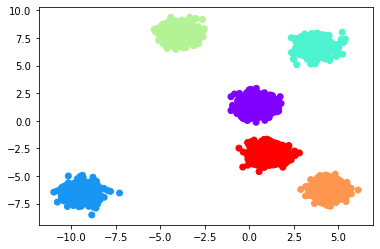

In [4]:
# Create Data
data = make_blobs(n_samples=3200, n_features=2, 
                           centers=6, cluster_std=0.5,random_state=101)
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)

In [6]:
kmeans.fit(data[0])

KMeans(n_clusters=2)

In [7]:
kmeans.predict(np.array([-10,10]).reshape(1,-1))

array([1])

In [8]:
kmeans.labels_

array([0, 0, 0, ..., 0, 1, 0])

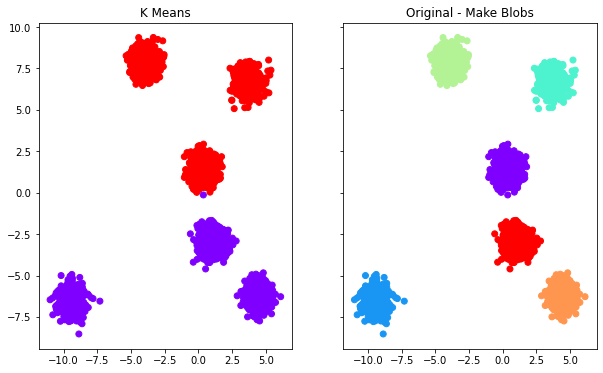

In [9]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow')
ax2.set_title("Original - Make Blobs")
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

# Elbow Method

In [10]:
sse = []
for k in range(2,21):
    kmeans = KMeans(n_clusters=k).fit(data[0])
    cents = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(data[0])
    curr_sse = 0
    for i in range(len(data[0])):
        curr_center = cents[pred_clusters[i]]
        curr_sse += (data[0][i,0] - curr_center[0])**2 + (data[0][i,1] - curr_center[1])**2
    print(curr_sse)
    sse.append(curr_sse)

89546.25923230145
35581.47649114368
17958.19107763794
6837.691305119199
1666.5420369222425
1569.3232976267302
1479.383805278601
1378.3966267779285
1294.7364397983981
1215.7988251720203
1128.4985874879192
1066.2874123055005
987.5420066639018
934.8415774608642
854.8627228919908
813.4768012323667
768.1767921365648
721.7817917706731
717.718541164115


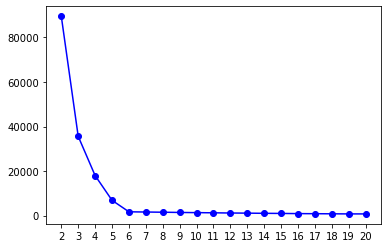

In [11]:
plt.xticks(range(1,21))
plt.plot(range(2,21),sse, "bo-", )